In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

import sys, os
sys.path.append(os.path.abspath("../src")) 

import importlib
import features
importlib.reload(features)
from features import linear_interpolation
from features import fill_extrapolation

In [2]:
data = pd.read_csv('World Energy Consumption.csv')

In [57]:
data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [58]:
data[(data['country'] == 'Turkey') & (~data['oil_consumption'].isna())]

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
19799,Turkey,1965,TUR,31374540.0,1.112204e+11,NaN,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,0.000,0.000,0.00,0.000,NaN,NaN
19800,Turkey,1966,TUR,32172782.0,1.249597e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19801,Turkey,1967,TUR,33026492.0,1.312731e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19802,Turkey,1968,TUR,33884076.0,1.408271e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19803,Turkey,1969,TUR,34721988.0,1.491415e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19804,Turkey,1970,TUR,35540988.0,1.572654e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19805,Turkey,1971,TUR,36359956.0,1.724745e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19806,Turkey,1972,TUR,37188036.0,1.848028e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19807,Turkey,1973,TUR,38028236.0,1.944424e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN
19808,Turkey,1974,TUR,38863424.0,2.115128e+11,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.00,0.000,NaN,NaN


In [3]:
oil_cols = []

for i in data.columns:
    if "oil" in i:
        oil_cols.append(i)

In [4]:
print(oil_cols) 

['oil_cons_change_pct', 'oil_cons_change_twh', 'oil_consumption', 'oil_elec_per_capita', 'oil_electricity', 'oil_energy_per_capita', 'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita', 'oil_production', 'oil_share_elec', 'oil_share_energy']


In [7]:
data[(data['country'] == 'Turkey') & (data['year'] > 2000)][['year','population','gdp', 'energy_per_capita','energy_per_gdp'] + oil_cols]

,year,population,gdp,energy_per_capita,energy_per_gdp,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
19835,2001,65072016.0,7.533268e+11,12073.247,1.043,-6.947,-25.833,346.004,159.823,10.40,5317.252,-9.126,-3.084,471.963,30.712,8.511,44.042
19836,2002,65988664.0,8.189381e+11,13026.979,1.050,6.914,23.924,369.928,159.118,10.50,5605.935,-2.763,-0.848,452.550,29.863,8.176,43.033
19837,2003,66867324.0,8.729224e+11,13613.353,1.043,-1.446,-5.348,364.580,134.595,9.00,5452.294,-3.223,-0.962,432.211,28.901,6.451,40.051
19838,2004,67785080.0,9.579008e+11,14380.439,1.018,2.247,8.191,372.771,111.972,7.59,5499.310,-5.829,-1.685,401.508,27.216,5.069,38.242
19839,2005,68704712.0,1.046619e+12,14507.764,0.952,-1.275,-4.753,368.018,89.222,6.13,5356.524,2.666,0.726,406.696,27.942,3.794,36.922
19840,2006,69601328.0,1.128342e+12,15888.103,0.980,3.964,14.590,382.608,76.866,5.35,5497.139,-3.463,-0.968,387.555,26.974,3.037,34.599
19841,2007,70468864.0,1.191690e+12,16664.893,0.985,1.811,6.928,389.536,107.707,7.59,5527.779,-2.742,-0.740,372.286,26.235,3.965,33.170
19842,2008,71320728.0,1.213760e+12,16521.768,0.971,-1.364,-5.314,384.222,123.807,8.83,5387.249,1.697,0.445,374.083,26.680,4.453,32.607
19843,2009,72225648.0,1.155017e+12,16535.234,1.034,1.779,6.834,391.056,86.534,6.25,5414.371,10.808,2.884,409.320,29.563,3.210,32.744
19844,2010,73195352.0,1.276139e+12,17211.758,0.987,-2.518,-9.848,381.208,52.326,3.83,5208.093,4.612,1.364,422.527,30.927,1.815,30.259


In [5]:
data_oil = data[['country','year','population','gdp', 'energy_per_capita','energy_per_gdp', 'solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'coal_consumption', 'gas_consumption', 'nuclear_consumption', 'coal_production', 'gas_production'] + oil_cols]

In [6]:
eu_countries = [
    "Austria","Belgium","Bulgaria","Croatia","Cyprus","Czechia","Denmark",
    "Estonia","Finland","France","Germany","Greece","Hungary","Ireland","Italy",
    "Latvia","Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal",
    "Romania","Slovakia","Slovenia","Spain","Sweden"
]
data_oil_eu = data_oil[data_oil['country'].isin(eu_countries)]

data_oil_eu.head()

,country,year,population,gdp,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,...,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
1677,Austria,1900,5979176.0,2.743996e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN
1678,Austria,1901,6040557.0,2.754978e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
1679,Austria,1902,6102565.0,2.862871e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.012,1.906,0.012,NaN,NaN
1680,Austria,1903,6165207.0,2.889683e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.000,1.886,0.012,NaN,NaN
1681,Austria,1904,6228492.0,2.934634e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.000,1.867,0.012,NaN,NaN


In [7]:
data_oil_eu = data_oil_eu[~data_oil_eu['oil_consumption'].isna()]
data_oil_eu.head()


,country,year,population,gdp,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,...,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
1742,Austria,1965,7269892.0,8.963552e+10,26066.176,2.114,NaN,NaN,47.557,NaN,...,65.297,NaN,NaN,8981.904,7.210,2.233,4567.283,33.204,NaN,34.458
1743,Austria,1966,7320920.0,9.467431e+10,27090.182,2.095,NaN,NaN,51.248,NaN,...,71.789,NaN,NaN,9805.988,-3.433,-1.140,4379.765,32.064,NaN,36.198
1744,Austria,1967,7375632.0,9.756080e+10,27165.602,2.054,NaN,NaN,52.333,NaN,...,76.548,NaN,NaN,10378.516,-2.612,-0.837,4233.746,31.227,NaN,38.205
1745,Austria,1968,7413813.0,1.019025e+11,28897.621,2.102,NaN,NaN,53.773,NaN,...,88.466,NaN,NaN,11932.600,1.453,0.454,4273.121,31.680,NaN,41.293
1746,Austria,1969,7439324.0,1.083046e+11,29831.541,2.049,NaN,NaN,49.435,NaN,...,97.226,NaN,NaN,13069.197,1.248,0.395,4311.620,32.076,NaN,43.810


In [8]:
data_oil_eu.groupby('country')['year'].min()

country
Austria        1965
Belgium        1965
Bulgaria       1965
Croatia        1990
Cyprus         1965
Czechia        1965
Denmark        1965
Estonia        1985
Finland        1965
France         1965
Germany        1965
Greece         1965
Hungary        1965
Ireland        1965
Italy          1965
Latvia         1985
Lithuania      1985
Luxembourg     1965
Netherlands    1965
Poland         1965
Portugal       1965
Romania        1965
Slovakia       1965
Slovenia       1990
Spain          1965
Sweden         1965
Name: year, dtype: int64

In [9]:
valid_countries = data_oil_eu.groupby('country')['year'].min().loc[lambda x: x <= 1980].index

data_oil_eu = data_oil_eu[data_oil_eu['country'].isin(valid_countries)]

data_oil_eu['country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Spain', 'Sweden'], dtype=object)

In [10]:
data_oil_eu.drop(['oil_prod_change_twh', 'oil_prod_change_pct', 'oil_energy_per_capita', 'oil_elec_per_capita', 'oil_cons_change_pct', 'oil_cons_change_twh'], axis = 1, inplace = True)
# oil_energy_per_capita: Total oil energy consumption per person -> oil_consumption/population
# oil_share_energy: Share (fraction or %) of total primary energy consumption that comes from oil. Indicates oil’s role in a country’s total energy mix.

In [11]:
data_oil_eu.head()

,country,year,population,gdp,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,...,gas_consumption,nuclear_consumption,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
1742,Austria,1965,7269892.0,8.963552e+10,26066.176,2.114,NaN,NaN,47.557,NaN,...,17.529,0.0,21.481,19.156,65.297,NaN,4567.283,33.204,NaN,34.458
1743,Austria,1966,7320920.0,9.467431e+10,27090.182,2.095,NaN,NaN,51.248,NaN,...,18.821,0.0,20.536,20.823,71.789,NaN,4379.765,32.064,NaN,36.198
1744,Austria,1967,7375632.0,9.756080e+10,27165.602,2.054,NaN,NaN,52.333,NaN,...,18.032,0.0,17.861,19.967,76.548,NaN,4233.746,31.227,NaN,38.205
1745,Austria,1968,7413813.0,1.019025e+11,28897.621,2.102,NaN,NaN,53.773,NaN,...,19.229,0.0,16.101,18.112,88.466,NaN,4273.121,31.680,NaN,41.293
1746,Austria,1969,7439324.0,1.083046e+11,29831.541,2.049,NaN,NaN,49.435,NaN,...,23.329,0.0,14.806,16.478,97.226,NaN,4311.620,32.076,NaN,43.810


In [12]:
data_oil_eu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 1742 to 18759
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1218 non-null   object 
 1   year                         1218 non-null   int64  
 2   population                   1218 non-null   float64
 3   gdp                          1109 non-null   float64
 4   energy_per_capita            1218 non-null   float64
 5   energy_per_gdp               1109 non-null   float64
 6   solar_consumption            881 non-null    float64
 7   wind_consumption             904 non-null    float64
 8   hydro_consumption            1195 non-null   float64
 9   biofuel_consumption          674 non-null    float64
 10  other_renewable_consumption  969 non-null    float64
 11  coal_consumption             1198 non-null   float64
 12  gas_consumption              1049 non-null   float64
 13  nuclear_consumption

In [13]:
data_oil_eu[~data_oil_eu['solar_consumption'].isna()].groupby('country')['year'].min()

country
Austria        1990
Belgium        1990
Bulgaria       1990
Cyprus         1990
Czechia        1990
Denmark        1990
Finland        1990
France         1990
Germany        1990
Greece         1990
Hungary        1990
Ireland        1990
Italy          1965
Luxembourg     1990
Netherlands    1965
Poland         1965
Portugal       1965
Romania        1971
Slovakia       1971
Spain          1965
Sweden         1965
Name: year, dtype: int64

In [15]:
len(data_oil_eu)

1218

In [14]:
data_oil_eu.isna().sum()

country                          0
year                             0
population                       0
gdp                            109
energy_per_capita                0
energy_per_gdp                 109
solar_consumption              337
wind_consumption               314
hydro_consumption               23
biofuel_consumption            544
other_renewable_consumption    249
coal_consumption                20
gas_consumption                169
nuclear_consumption            146
coal_production                167
gas_production                 221
oil_consumption                  0
oil_electricity                495
oil_prod_per_capita            254
oil_production                 254
oil_share_elec                 495
oil_share_energy               171
dtype: int64

In [16]:
data_oil_eu[data_oil_eu['gdp'].isna()]

,country,year,population,gdp,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,...,gas_consumption,nuclear_consumption,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy
1796,Austria,2019,8879939.0,NaN,48314.258,NaN,4.487,19.638,107.616,5.852,...,89.004,NaN,NaN,NaN,153.584,3.40,NaN,NaN,4.798,35.798
1797,Austria,2020,8907780.0,NaN,45028.270,NaN,5.365,17.837,110.299,4.977,...,85.272,NaN,NaN,NaN,133.632,3.26,NaN,NaN,4.712,33.316
1798,Austria,2021,8922086.0,NaN,45241.051,NaN,7.281,17.637,101.400,4.996,...,90.139,NaN,NaN,NaN,137.920,3.44,NaN,NaN,5.138,34.169
1799,Austria,2022,8939617.0,NaN,42685.379,NaN,8.391,18.889,92.647,4.775,...,79.128,NaN,NaN,NaN,134.479,3.44,NaN,NaN,5.318,35.242
2405,Belgium,2019,11510569.0,NaN,64152.262,NaN,11.209,25.715,0.796,5.420,...,173.869,110.092,NaN,NaN,358.851,3.69,NaN,NaN,3.997,48.597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,Spain,2022,47558632.0,NaN,33615.332,NaN,88.013,163.476,47.546,15.480,...,330.969,146.599,0.494,NaN,737.947,11.52,NaN,NaN,4.045,46.159
18756,Sweden,2019,10267922.0,NaN,63283.469,NaN,1.748,52.315,172.122,17.033,...,10.202,167.273,NaN,NaN,164.631,2.85,NaN,NaN,1.692,25.336
18757,Sweden,2020,10368968.0,NaN,59395.523,NaN,2.718,72.292,189.844,15.520,...,9.919,123.988,NaN,NaN,146.979,2.34,NaN,NaN,1.429,23.865
18758,Sweden,2021,10467095.0,NaN,60186.461,NaN,3.943,70.934,193.095,18.291,...,10.648,132.993,NaN,NaN,139.176,2.76,NaN,NaN,1.607,22.092


In [17]:
data_oil_eu[data_oil_eu['gdp'].isna()]['year'].unique()

array([2019, 2020, 2021, 2022, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984], dtype=int64)

In [18]:
gdp_new = wb.download(
    indicator='NY.GDP.MKTP.CD',
    country=['AT','BE','BG','CY','CZ','DK','FI','FR','DE','GR',
             'HU','IE','IT','LU','NL','PL','PT','RO','SK','ES','SE'],
    start=1965, end=2022
).reset_index()

gdp_new.head()

C:\Users\mertk\AppData\Local\Temp\ipykernel_16836\4033759925.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  gdp_new = wb.download(


,country,year,NY.GDP.MKTP.CD
0,Austria,2022,4.717736e+11
1,Austria,2021,4.804670e+11
2,Austria,2020,4.343976e+11
3,Austria,2019,4.429836e+11
4,Austria,2018,4.525823e+11


In [19]:
gdp_new['country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany',
       'Denmark', 'Spain', 'Finland', 'France', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovak Republic', 'Sweden'], dtype=object)

In [20]:
country_mapping = {'Slovak Republic':'Slovakia'}

gdp_new['country'] = gdp_new['country'].replace(country_mapping)

gdp_new.rename(columns={'NY.GDP.MKTP.CD': 'gdp_wb'}, inplace=True)

In [21]:
gdp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  1218 non-null   object 
 1   year     1218 non-null   object 
 2   gdp_wb   1093 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB


In [22]:
gdp_new['year'] = gdp_new['year'].astype('int64')

In [23]:
data_oil_eu = data_oil_eu.merge(gdp_new, how="left", on=['country', 'year'])

In [24]:
data_oil_eu.head()

,country,year,population,gdp,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,...,nuclear_consumption,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb
0,Austria,1965,7269892.0,8.963552e+10,26066.176,2.114,NaN,NaN,47.557,NaN,...,0.0,21.481,19.156,65.297,NaN,4567.283,33.204,NaN,34.458,1.004166e+10
1,Austria,1966,7320920.0,9.467431e+10,27090.182,2.095,NaN,NaN,51.248,NaN,...,0.0,20.536,20.823,71.789,NaN,4379.765,32.064,NaN,36.198,1.093953e+10
2,Austria,1967,7375632.0,9.756080e+10,27165.602,2.054,NaN,NaN,52.333,NaN,...,0.0,17.861,19.967,76.548,NaN,4233.746,31.227,NaN,38.205,1.163457e+10
3,Austria,1968,7413813.0,1.019025e+11,28897.621,2.102,NaN,NaN,53.773,NaN,...,0.0,16.101,18.112,88.466,NaN,4273.121,31.680,NaN,41.293,1.249986e+10
4,Austria,1969,7439324.0,1.083046e+11,29831.541,2.049,NaN,NaN,49.435,NaN,...,0.0,14.806,16.478,97.226,NaN,4311.620,32.076,NaN,43.810,1.364748e+10


In [28]:
data_oil_eu[(data_oil_eu['country'] == 'Sweden')&(data_oil_eu['year'] == 2022)]

,country,year,population,gdp,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,...,nuclear_consumption,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb
1217,Sweden,2022,10549349.0,NaN,59926.805,NaN,6.861,85.048,181.871,20.695,...,128.951,NaN,NaN,138.528,2.76,NaN,NaN,1.608,21.913,5.798957e+11


In [25]:
data_oil_eu[data_oil_eu['gdp_wb'].isna()]['country'].unique()

array(['Bulgaria', 'Cyprus', 'Czechia', 'Hungary', 'Poland', 'Romania',
       'Slovakia'], dtype=object)

In [26]:
data_oil_eu['gdp_wb'] = data_oil_eu['gdp_wb'].fillna(data_oil_eu['gdp'])

In [27]:
data_oil_eu[data_oil_eu['gdp_wb'].isna()]['country'].unique()

array(['Czechia', 'Slovakia'], dtype=object)

In [28]:
data_oil_eu[data_oil_eu['gdp_wb'].isna()]

,country,year,population,gdp,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,...,nuclear_consumption,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb
232,Czechia,1965,9702728.0,NaN,48314.055,NaN,NaN,NaN,6.599,NaN,...,0.000,NaN,NaN,47.047,NaN,NaN,NaN,NaN,10.036,NaN
233,Czechia,1966,9731810.0,NaN,48529.977,NaN,NaN,NaN,6.220,NaN,...,0.000,NaN,NaN,51.942,NaN,NaN,NaN,NaN,10.998,NaN
234,Czechia,1967,9754254.0,NaN,47665.371,NaN,NaN,NaN,5.606,NaN,...,0.000,NaN,NaN,57.799,NaN,NaN,NaN,NaN,12.432,NaN
235,Czechia,1968,9770101.0,NaN,49630.211,NaN,NaN,NaN,4.339,NaN,...,0.000,NaN,NaN,63.840,NaN,NaN,NaN,NaN,13.166,NaN
236,Czechia,1969,9782559.0,NaN,51676.969,NaN,NaN,NaN,3.541,NaN,...,0.000,NaN,NaN,68.493,NaN,NaN,NaN,NaN,13.549,NaN
1044,Slovakia,1965,4363517.0,NaN,24483.969,NaN,NaN,NaN,6.573,0.0,...,0.000,NaN,NaN,27.047,NaN,NaN,NaN,NaN,25.316,NaN
1045,Slovakia,1966,4400355.0,NaN,25130.607,NaN,NaN,NaN,6.299,0.0,...,0.000,NaN,NaN,29.851,NaN,NaN,NaN,NaN,26.994,NaN
1046,Slovakia,1967,4433964.0,NaN,25070.963,NaN,NaN,NaN,5.397,0.0,...,0.000,NaN,NaN,33.213,NaN,NaN,NaN,NaN,29.878,NaN
1047,Slovakia,1968,4463936.0,NaN,27483.607,NaN,NaN,NaN,4.953,0.0,...,0.000,NaN,NaN,36.703,NaN,NaN,NaN,NaN,29.916,NaN
1048,Slovakia,1969,4492217.0,NaN,28519.625,NaN,NaN,NaN,3.855,0.0,...,0.000,NaN,NaN,39.374,NaN,NaN,NaN,NaN,30.733,NaN


In [29]:
data_oil_eu.drop('gdp', axis = 1, inplace = True)

In [30]:
start_year = data_oil_eu[~data_oil_eu['gdp_wb'].isna()].groupby('country')['year'].min().rename('min_year')

data_oil_eu = data_oil_eu.merge(start_year, how = "left", on='country')

data_oil_eu = data_oil_eu[data_oil_eu['year'] >= data_oil_eu['min_year']].drop(columns='min_year')

In [31]:
data_oil_eu[data_oil_eu['gdp_wb'].isna()]

,country,year,population,energy_per_capita,energy_per_gdp,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,...,nuclear_consumption,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb


In [32]:
# we have to fix per gdp columns as well since we are using a new gdp
data_oil_eu['energy_per_gdp_new'] = data_oil_eu['population'] * data_oil_eu['energy_per_capita'] / data_oil_eu['gdp_wb']

In [33]:
data[(data['country'] == 'Austria')&(data['year'] >= 2000)][['year', 'country', 'population', 'energy_per_capita', 'gdp', 'energy_per_gdp']]

,year,country,population,energy_per_capita,gdp,energy_per_gdp
1777,2000,Austria,8010425.0,48863.281,2.804102e+11,1.396
1778,2001,Austria,8039633.0,50421.105,2.853359e+11,1.421
1779,2002,Austria,8078994.0,50254.641,2.912255e+11,1.394
1780,2003,Austria,8120105.0,50523.203,2.946044e+11,1.393
1781,2004,Austria,8171215.0,51139.312,3.037864e+11,1.376
1782,2005,Austria,8227034.0,51714.719,3.115376e+11,1.366
1783,2006,Austria,8267771.0,50921.684,3.232639e+11,1.302
1784,2007,Austria,8294720.0,49669.195,3.363160e+11,1.225
1785,2008,Austria,8321134.0,50475.008,3.428909e+11,1.225
1786,2009,Austria,8342939.0,48765.184,3.311922e+11,1.228


In [34]:
data_oil_eu[(data_oil_eu['country'] == 'Austria')&(data_oil_eu['year'] >= 2000)][['year', 'country', 'population', 'energy_per_capita', 'gdp_wb', 'energy_per_gdp_new']]

,year,country,population,energy_per_capita,gdp_wb,energy_per_gdp_new
35,2000,Austria,8010425.0,48863.281,1.961816e+11,1.995170
36,2001,Austria,8039633.0,50421.105,1.964772e+11,2.063177
37,2002,Austria,8078994.0,50254.641,2.128372e+11,1.907594
38,2003,Austria,8120105.0,50523.203,2.607798e+11,1.573180
39,2004,Austria,8171215.0,51139.312,2.992104e+11,1.396577
40,2005,Austria,8227034.0,51714.719,3.139523e+11,1.355170
41,2006,Austria,8267771.0,50921.684,3.339060e+11,1.260860
42,2007,Austria,8294720.0,49669.195,3.867602e+11,1.065239
43,2008,Austria,8321134.0,50475.008,4.292344e+11,0.978508
44,2009,Austria,8342939.0,48765.184,3.992901e+11,1.018921


gdp values and thus gdp related metric are different when we use World Bank data that is because gdp in world bank data is not adjusted for inflation or PPP. However we believe the pattern will be similar and wont effect our prediction task because of that we will stick with the World Bank data.

In [35]:
data_oil_eu.drop('energy_per_gdp', axis = 1, inplace = True)

In [36]:
# in the original data for all of the countries gdp after 2018 is missing

final_countries = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Spain', 'Sweden']

data[(data['country'].isin(final_countries)) & (data['year'] > 2018) & (~data['gdp'].isna())]

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy


In [37]:
data_oil_eu.isna().sum()

country                          0
year                             0
population                       0
energy_per_capita                0
solar_consumption              326
wind_consumption               303
hydro_consumption               23
biofuel_consumption            539
other_renewable_consumption    238
coal_consumption                20
gas_consumption                169
nuclear_consumption            146
coal_production                142
gas_production                 196
oil_consumption                  0
oil_electricity                470
oil_prod_per_capita            229
oil_production                 229
oil_share_elec                 470
oil_share_energy               171
gdp_wb                           0
energy_per_gdp_new               0
dtype: int64

In [38]:
data_oil_eu[data_oil_eu['coal_consumption'].isna()]

,country,year,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,...,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new
174,Cyprus,1965,617353.0,7581.157,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,4.680,NaN,NaN,NaN,NaN,NaN,2.850610e+09,1.641842
175,Cyprus,1966,622575.0,8575.083,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,5.339,NaN,NaN,NaN,NaN,NaN,3.024385e+09,1.765196
176,Cyprus,1967,627698.0,9219.807,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,5.787,NaN,NaN,NaN,NaN,NaN,3.435761e+09,1.684417
177,Cyprus,1968,632456.0,10162.369,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,6.427,NaN,NaN,NaN,NaN,NaN,3.593772e+09,1.788442
178,Cyprus,1969,636830.0,11918.084,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,7.590,NaN,NaN,NaN,NaN,NaN,3.928193e+09,1.932134
179,Cyprus,1970,640804.0,12491.854,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,8.005,NaN,NaN,NaN,NaN,NaN,4.050214e+09,1.976397
180,Cyprus,1971,644416.0,14817.312,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,9.549,NaN,NaN,NaN,NaN,NaN,4.575364e+09,2.086941
181,Cyprus,1972,647632.0,16578.896,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,10.737,NaN,NaN,NaN,NaN,NaN,4.890777e+09,2.195362
182,Cyprus,1973,650706.0,17702.572,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,11.519,NaN,NaN,NaN,NaN,NaN,5.016051e+09,2.296462
183,Cyprus,1974,648594.0,15746.498,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,10.213,NaN,NaN,NaN,NaN,NaN,4.166472e+09,2.451255


In [39]:
data_oil_eu[data_oil_eu['gas_consumption'].isna()]['country'].unique()

array(['Cyprus', 'Denmark', 'Finland', 'Greece', 'Ireland', 'Portugal',
       'Spain', 'Sweden'], dtype=object)

In [40]:
data_oil_eu[(data_oil_eu['gas_consumption'].isna())&(data_oil_eu['country'] == 'Greece')]
# If the infrastructure (pipelines, import terminals) or market for natural gas was very little
# or non-existent in the earlier years, then the absence of data may reflect “virtually no 
# consumption” rather than just missing measurement.

,country,year,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,...,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new
522,Greece,1965,8526265.0,9282.632,NaN,NaN,2.369,NaN,NaN,24.504,...,8.106,0.0,52.273,NaN,0.000,0.000,NaN,NaN,7.582210e+09,10.438406
523,Greece,1966,8520636.0,10169.437,NaN,NaN,5.116,NaN,NaN,24.458,...,7.927,0.0,57.077,NaN,0.000,0.000,NaN,NaN,8.472021e+09,10.227792
524,Greece,1967,8518064.0,11199.461,NaN,NaN,4.909,NaN,NaN,23.376,...,8.497,0.0,67.113,NaN,0.000,0.000,NaN,NaN,9.146593e+09,10.429865
525,Greece,1968,8518841.0,11637.534,NaN,NaN,4.045,NaN,NaN,26.400,...,9.140,0.0,68.693,NaN,0.000,0.000,NaN,NaN,9.950331e+09,9.963317
526,Greece,1969,8526141.0,12282.445,NaN,NaN,6.077,NaN,NaN,25.551,...,10.747,0.0,73.094,NaN,0.000,0.000,NaN,NaN,1.145411e+10,9.142735
527,Greece,1970,8544874.0,13617.834,NaN,NaN,7.795,NaN,NaN,29.401,...,12.539,0.0,79.167,NaN,0.000,0.000,NaN,NaN,1.295711e+10,8.980602
528,Greece,1971,8576110.0,16164.987,NaN,NaN,7.842,NaN,NaN,43.333,...,17.439,0.0,87.457,NaN,0.000,0.000,NaN,NaN,1.438881e+10,9.634760
529,Greece,1972,8616664.0,18048.340,NaN,NaN,7.916,NaN,NaN,46.287,...,18.487,0.0,101.313,NaN,0.000,0.000,NaN,NaN,1.665066e+10,9.339959
530,Greece,1973,8666390.0,20646.846,NaN,NaN,6.573,NaN,NaN,54.440,...,21.082,0.0,117.920,NaN,0.000,0.000,NaN,NaN,2.203702e+10,8.119683
531,Greece,1974,8729703.0,20039.398,NaN,NaN,6.940,NaN,NaN,57.336,...,22.513,0.0,110.662,NaN,0.000,0.000,NaN,NaN,2.499872e+10,6.997879


In [51]:
data_oil_eu[data_oil_eu['oil_share_elec'].isna()]

,country,year,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,...,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new
0,Austria,1965,7269892.0,26066.176,NaN,NaN,47.557,NaN,NaN,59.115,...,21.481,19.156,65.297,NaN,4567.283,33.204,NaN,34.458,1.004166e+10,18.871212
1,Austria,1966,7320920.0,27090.182,NaN,NaN,51.248,NaN,NaN,56.468,...,20.536,20.823,71.789,NaN,4379.765,32.064,NaN,36.198,1.093953e+10,18.129218
2,Austria,1967,7375632.0,27165.602,NaN,NaN,52.333,NaN,NaN,53.451,...,17.861,19.967,76.548,NaN,4233.746,31.227,NaN,38.205,1.163457e+10,17.221392
3,Austria,1968,7413813.0,28897.621,NaN,NaN,53.773,NaN,NaN,52.774,...,16.101,18.112,88.466,NaN,4273.121,31.680,NaN,41.293,1.249986e+10,17.139511
4,Austria,1969,7439324.0,29831.541,NaN,NaN,49.435,NaN,NaN,51.936,...,14.806,16.478,97.226,NaN,4311.620,32.076,NaN,43.810,1.364748e+10,16.261359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Sweden,1985,8389918.0,82435.344,0.0,0.018,209.911,0.0,5.752,33.841,...,0.080,0.000,275.222,NaN,7.575,0.064,NaN,39.793,1.139594e+11,6.069055
1181,Sweden,1986,8411798.0,85226.414,0.0,0.018,180.178,0.0,6.321,36.079,...,0.080,0.000,293.945,NaN,0.000,0.000,NaN,41.002,1.502816e+11,4.770427
1182,Sweden,1987,8438000.0,83179.805,0.0,0.018,212.471,0.0,6.254,35.624,...,0.167,0.000,253.788,NaN,0.000,0.000,NaN,36.159,1.827464e+11,3.840684
1183,Sweden,1988,8468135.0,81001.203,0.0,0.015,206.643,0.0,6.515,34.972,...,0.107,0.000,237.564,NaN,0.000,0.000,NaN,34.634,2.066890e+11,3.318654


In [41]:
cols_to_interpolate = [
    'solar_consumption',
    'wind_consumption',
    'hydro_consumption',
    'biofuel_consumption',
    'other_renewable_consumption',
    'coal_consumption',
    'gas_consumption',
    'nuclear_consumption',
    'coal_production',
    'gas_production',
    'oil_production',
    'oil_prod_per_capita',
    'oil_electricity',
    'oil_share_elec',
    'oil_share_energy'
]

data_oil_eu_interp = data_oil_eu.copy()
for i in cols_to_interpolate:
    data_oil_eu_interp = linear_interpolation(data_oil_eu_interp,i)

In [42]:
data_oil_eu_interp.isna().sum()
# hydro_consumption, gas_consumption, nuclear_consumption, coal_production, gas_production, oil_production

country                          0
year                             0
population                       0
energy_per_capita                0
solar_consumption                0
wind_consumption                 0
hydro_consumption               23
biofuel_consumption              0
other_renewable_consumption      0
coal_consumption                 0
gas_consumption                 15
nuclear_consumption             97
coal_production                 78
gas_production                  90
oil_consumption                  0
oil_electricity                  0
oil_prod_per_capita            108
oil_production                 108
oil_share_elec                   0
oil_share_energy                 0
gdp_wb                           0
energy_per_gdp_new               0
dtype: int64

In [43]:
data_oil_eu_interp[data_oil_eu_interp['hydro_consumption'].isna()]

,country,year,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,...,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new
209,Cyprus,2000,948238.0,31912.982,0.000,0.000,NaN,0.000,0.000,0.419,...,0.0,0.0,29.842,3.37,0.0,0.0,100.000,0.0,9.985847e+09,3.030399
210,Cyprus,2001,964838.0,31725.172,0.000,0.000,NaN,0.000,0.000,0.616,...,0.0,0.0,29.993,3.55,0.0,0.0,100.000,0.0,1.039790e+10,2.943830
211,Cyprus,2002,982202.0,30732.920,0.000,0.000,NaN,0.000,0.000,0.512,...,0.0,0.0,29.674,3.79,0.0,0.0,100.000,0.0,1.142023e+10,2.643199
212,Cyprus,2003,1000355.0,32076.912,0.000,0.000,NaN,0.000,0.000,0.512,...,0.0,0.0,31.577,4.05,0.0,0.0,100.000,0.0,1.454733e+10,2.205786
213,Cyprus,2004,1018688.0,30655.473,0.001,0.001,NaN,0.000,0.000,0.512,...,0.0,0.0,30.714,4.20,0.0,0.0,100.000,0.0,1.732055e+10,1.802966
214,Cyprus,2005,1037070.0,33741.973,0.002,0.001,NaN,0.000,0.000,0.512,...,0.0,0.0,34.478,4.38,0.0,0.0,100.000,0.0,1.843341e+10,1.898335
215,Cyprus,2006,1055445.0,32604.191,0.003,0.001,NaN,0.000,0.000,0.351,...,0.0,0.0,34.057,4.65,0.0,0.0,100.000,0.0,2.007275e+10,1.714360
216,Cyprus,2007,1073875.0,32579.771,0.005,0.001,NaN,0.010,0.004,0.319,...,0.0,0.0,34.647,4.87,0.0,0.0,100.000,0.0,2.396873e+10,1.459677
217,Cyprus,2008,1092402.0,32822.430,0.008,0.001,NaN,0.164,0.038,0.261,...,0.0,0.0,35.382,5.06,0.0,0.0,99.803,0.0,2.784465e+10,1.287691
218,Cyprus,2009,1110979.0,31506.953,0.011,0.001,NaN,0.175,0.086,0.138,...,0.0,0.0,34.592,5.18,0.0,0.0,99.424,0.0,2.604818e+10,1.343801


In [44]:
data_oil_eu_interp[data_oil_eu_interp['gas_consumption'].isna()]

,country,year,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,...,coal_production,gas_production,oil_consumption,oil_electricity,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new
217,Cyprus,2008,1092402.0,32822.430,0.008,0.001,NaN,0.164,0.038,0.261,...,0.0,0.0,35.382,5.06,0.0,0.0,99.803,0.0,2.784465e+10,1.287691
218,Cyprus,2009,1110979.0,31506.953,0.011,0.001,NaN,0.175,0.086,0.138,...,0.0,0.0,34.592,5.18,0.0,0.0,99.424,0.0,2.604818e+10,1.343801
219,Cyprus,2010,1129693.0,30146.273,0.019,0.086,NaN,0.164,0.112,0.170,...,0.0,0.0,33.504,5.25,0.0,0.0,98.499,0.0,2.579994e+10,1.320004
220,Cyprus,2011,1145090.0,29451.955,0.033,0.314,NaN,0.185,0.166,0.080,...,0.0,0.0,32.946,4.75,0.0,0.0,96.545,0.0,2.764155e+10,1.220089
221,Cyprus,2012,1156556.0,27326.793,0.060,0.507,NaN,0.185,0.160,0.003,...,0.0,0.0,30.690,4.46,0.0,0.0,94.492,0.0,2.504744e+10,1.261804
222,Cyprus,2013,1166972.0,24232.332,0.128,0.630,NaN,0.175,0.156,0.003,...,0.0,0.0,27.187,3.96,0.0,0.0,92.308,0.0,2.395971e+10,1.180250
223,Cyprus,2014,1176997.0,24039.480,0.226,0.498,NaN,0.113,0.161,0.026,...,0.0,0.0,27.270,4.03,0.0,0.0,92.857,0.0,2.322592e+10,1.218225
224,Cyprus,2015,1187286.0,24580.830,0.341,0.597,NaN,0.113,0.164,0.039,...,0.0,0.0,27.931,4.14,0.0,0.0,91.189,0.0,1.990928e+10,1.465873
225,Cyprus,2016,1197889.0,26494.055,0.391,0.607,NaN,0.103,0.166,0.005,...,0.0,0.0,30.465,4.46,0.0,0.0,91.207,0.0,2.104646e+10,1.507946
226,Cyprus,2017,1208527.0,26971.416,0.458,0.563,NaN,0.100,0.165,0.035,...,NaN,NaN,31.276,4.57,NaN,NaN,91.400,0.0,2.294657e+10,1.420504


In [45]:
data_oil_eu_interp[data_oil_eu_interp['nuclear_consumption'].isna()]['country'].unique()
# ['Austria', 'Cyprus', 'Denmark', 'Italy', 'Portugal']
data_oil_eu_interp[data_oil_eu_interp['nuclear_consumption'].isna()]['year'].unique()
# between 2000-2022

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [46]:
data_oil_eu_interp[data_oil_eu_interp['coal_production'].isna()]['country'].unique()
# ['Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finland', 'France','Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Slovakia', 'Sweden']
data_oil_eu_interp[data_oil_eu_interp['coal_production'].isna()]['year'].unique()
# array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)
# logical to fill with 0s since these countries stopped coal production mainly as part of climate and energy-transition policies.

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [47]:
coal_na_prod = ['Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finland', 'France','Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Slovakia', 'Sweden']

data_oil_eu_interp[(data_oil_eu_interp['country'].isin(coal_na_prod)) & (data_oil_eu_interp['year'] == 2016)][['country', 'coal_production']]


,country,coal_production
51,Austria,0.000
109,Belgium,0.000
225,Cyprus,0.000
336,Denmark,0.000
394,Finland,0.000
452,France,0.000
684,Ireland,0.000
742,Italy,0.000
800,Luxembourg,0.000
858,Netherlands,0.000


In [48]:
data_oil_eu_interp[data_oil_eu_interp['gas_production'].isna()]['country'].unique()
# ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Luxembourg', 'Portugal', 'Slovakia', 'Spain', 'Sweden']
data_oil_eu_interp[data_oil_eu_interp['gas_production'].isna()]['year'].unique()
# array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [49]:
gas_na_prod = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Luxembourg', 'Portugal', 'Slovakia', 'Spain', 'Sweden']

data_oil_eu_interp[(data_oil_eu_interp['country'].isin(gas_na_prod)) & (data_oil_eu_interp['year'] == 2016)][['country', 'gas_production']]


,country,gas_production
51,Austria,12.600
109,Belgium,0.000
167,Bulgaria,0.974
225,Cyprus,0.000
278,Czechia,2.338
394,Finland,0.000
452,France,0.236
568,Greece,0.137
626,Hungary,18.395
684,Ireland,32.247


In [50]:
data_oil_eu_interp_extrap = data_oil_eu_interp.copy()
extrapolation_columns = ['hydro_consumption', 'gas_consumption', 'nuclear_consumption', 'coal_production', 'gas_production', 'oil_production']

for col in extrapolation_columns:
    data_oil_eu_interp_extrap = fill_extrapolation(data_oil_eu_interp_extrap,col)


In [51]:
data_oil_eu_interp[data_oil_eu_interp['country'] == 'Netherlands'][['year','oil_production']]

,year,oil_production
807,1965,27.854
808,1966,27.517
809,1967,26.342
810,1968,24.970
811,1969,23.493
812,1970,22.318
813,1971,19.934
814,1972,18.573
815,1973,17.352
816,1974,16.991


In [83]:
data_oil_eu_interp_extrap[data_oil_eu_interp_extrap['country'] == 'Netherlands'][['year','oil_production']]

,year,oil_production
807,1965,27.854000
808,1966,27.517000
809,1967,26.342000
810,1968,24.970000
811,1969,23.493000
812,1970,22.318000
813,1971,19.934000
814,1972,18.573000
815,1973,17.352000
816,1974,16.991000


In [52]:
data_oil_eu_interp_extrap[data_oil_eu_interp_extrap['country'] == 'Cyprus'][['year','gas_consumption']]

,year,gas_consumption
174,1965,0.0
175,1966,0.0
176,1967,0.0
177,1968,0.0
178,1969,0.0
179,1970,0.0
180,1971,0.0
181,1972,0.0
182,1973,0.0
183,1974,0.0


In [53]:
data_oil_eu_interp_extrap.isna().sum()

country                          0
year                             0
population                       0
energy_per_capita                0
solar_consumption                0
wind_consumption                 0
hydro_consumption                0
biofuel_consumption              0
other_renewable_consumption      0
coal_consumption                 0
gas_consumption                  0
nuclear_consumption              0
coal_production                  0
gas_production                   0
oil_consumption                  0
oil_electricity                  0
oil_prod_per_capita            108
oil_production                   0
oil_share_elec                   0
oil_share_energy                 0
gdp_wb                           0
energy_per_gdp_new               0
dtype: int64

In [54]:
data_oil_eu_interp_extrap['oil_prod_per_capita_new'] = data_oil_eu_interp_extrap['oil_production'] * 1e9 / data_oil_eu_interp_extrap['population']

In [55]:
data_oil_eu_interp_extrap[['oil_prod_per_capita_new', 'oil_prod_per_capita']]

,oil_prod_per_capita_new,oil_prod_per_capita
0,4567.330574,4567.283
1,4379.777405,4379.765
2,4233.806676,4233.746
3,4273.104811,4273.121
4,4311.682083,4311.620
...,...,...
1188,0.000000,NaN
1189,0.000000,NaN
1190,0.000000,NaN
1191,0.000000,NaN


In [56]:
data_oil_eu_interp_extrap.drop('oil_prod_per_capita', axis = 1, inplace = True)

In [57]:
data_oil_eu_interp_extrap.isna().sum()

country                        0
year                           0
population                     0
energy_per_capita              0
solar_consumption              0
wind_consumption               0
hydro_consumption              0
biofuel_consumption            0
other_renewable_consumption    0
coal_consumption               0
gas_consumption                0
nuclear_consumption            0
coal_production                0
gas_production                 0
oil_consumption                0
oil_electricity                0
oil_production                 0
oil_share_elec                 0
oil_share_energy               0
gdp_wb                         0
energy_per_gdp_new             0
oil_prod_per_capita_new        0
dtype: int64

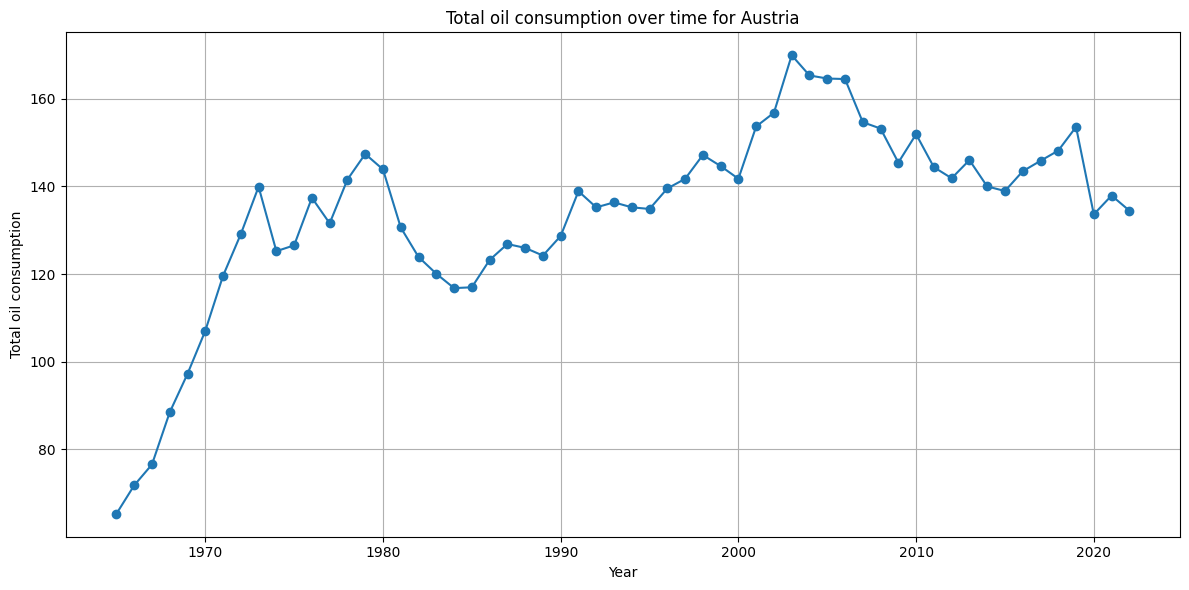

In [58]:
austria_year_oil = data_oil_eu_interp_extrap[data_oil_eu_interp_extrap['country'] == 'Austria'][['year', 'oil_consumption']]

plt.figure(figsize=(12, 6))
plt.plot(austria_year_oil['year'], austria_year_oil['oil_consumption'], marker='o')

plt.title("Total oil consumption over time for Austria")
plt.xlabel("Year")
plt.ylabel("Total oil consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
data_oil_eu_interp_extrap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1193 non-null   object 
 1   year                         1193 non-null   int64  
 2   population                   1193 non-null   float64
 3   energy_per_capita            1193 non-null   float64
 4   solar_consumption            1193 non-null   float64
 5   wind_consumption             1193 non-null   float64
 6   hydro_consumption            1193 non-null   float64
 7   biofuel_consumption          1193 non-null   float64
 8   other_renewable_consumption  1193 non-null   float64
 9   coal_consumption             1193 non-null   float64
 10  gas_consumption              1193 non-null   float64
 11  nuclear_consumption          1193 non-null   float64
 12  coal_production              1193 non-null   float64
 13  gas_production    

In [63]:
corr_features = [
    'population',
    'energy_per_capita',
    'solar_consumption',
    'wind_consumption',
    'hydro_consumption',
    'biofuel_consumption',
    'other_renewable_consumption',
    'coal_consumption',
    'gas_consumption',
    'nuclear_consumption',
    'coal_production',
    'gas_production',
    'oil_production',
    'oil_electricity',
    'oil_share_elec',
    'oil_share_energy',
    'gdp_wb',
    'energy_per_gdp_new',
    'oil_prod_per_capita_new'
]

corr = data_oil_eu_interp_extrap[corr_features + ['oil_consumption']].corr()**2

corr.head()

,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,gas_consumption,nuclear_consumption,coal_production,gas_production,oil_production,oil_electricity,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new,oil_prod_per_capita_new,oil_consumption
population,1.000000,0.016637,0.155242,0.169485,0.223272,0.217973,0.200774,0.468900,0.635414,0.254563,0.289844,0.035348,0.079893,0.194596,0.011279,0.041305,0.567749,9.754397e-03,0.007605,0.846935
energy_per_capita,0.016637,1.000000,0.001136,0.000200,0.009897,0.000336,0.006547,0.000002,0.001576,0.016454,0.001440,0.011908,0.019482,0.001926,0.003833,0.060083,0.002734,4.553020e-07,0.003349,0.001355
solar_consumption,0.155242,0.001136,1.000000,0.763200,0.012588,0.524178,0.679043,0.014725,0.234029,0.016990,0.000714,0.000493,0.001976,0.028297,0.001333,0.000850,0.440655,2.553670e-02,0.002114,0.081076
wind_consumption,0.169485,0.000200,0.763200,1.000000,0.016931,0.641837,0.642734,0.022108,0.236785,0.040162,0.001780,0.000278,0.001715,0.036295,0.002282,0.002893,0.506142,4.418394e-02,0.000039,0.105546
hydro_consumption,0.223272,0.009897,0.012588,0.016931,1.000000,0.069941,0.055783,0.000705,0.076204,0.257588,0.006741,0.005903,0.001550,0.073496,0.009986,0.012173,0.150421,1.987351e-02,0.014506,0.251700


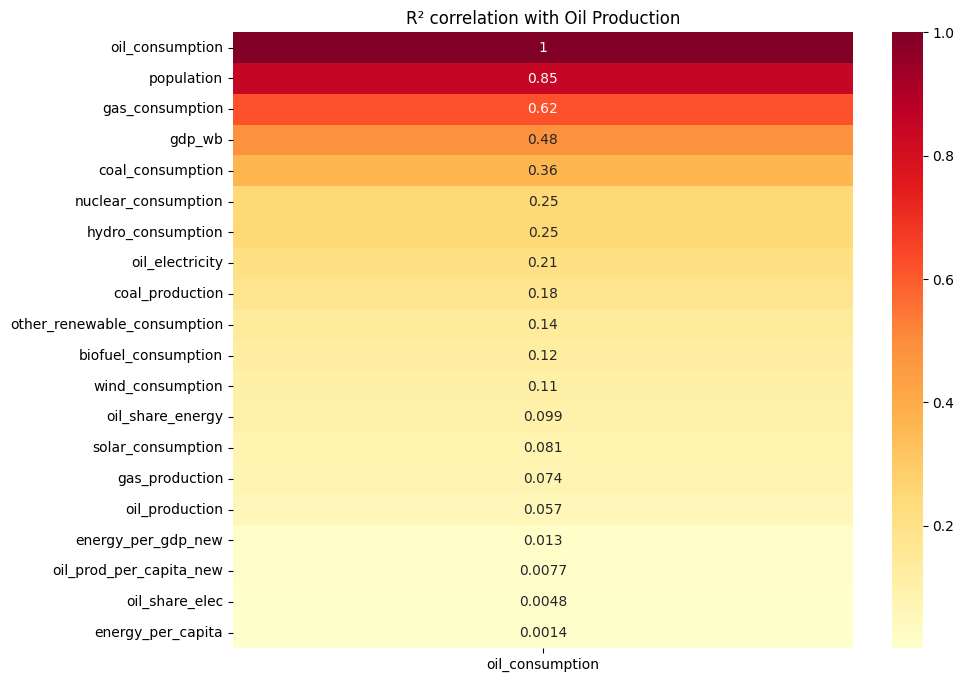

In [64]:
r2_with_target = corr['oil_consumption'].sort_values(ascending=False)
sorted_features = r2_with_target.index.tolist()

plt.figure(figsize=(10, 8))
# used corr.loc[corr_features, ['oil_consumption']] instead of corr['oil_consumption'] because
# heatmap expects 2D dataframe not Series (1D)
sns.heatmap(corr.loc[sorted_features, ['oil_consumption']], annot=True, cmap='YlOrRd')
plt.title('R² correlation with Oil Production')
plt.show()

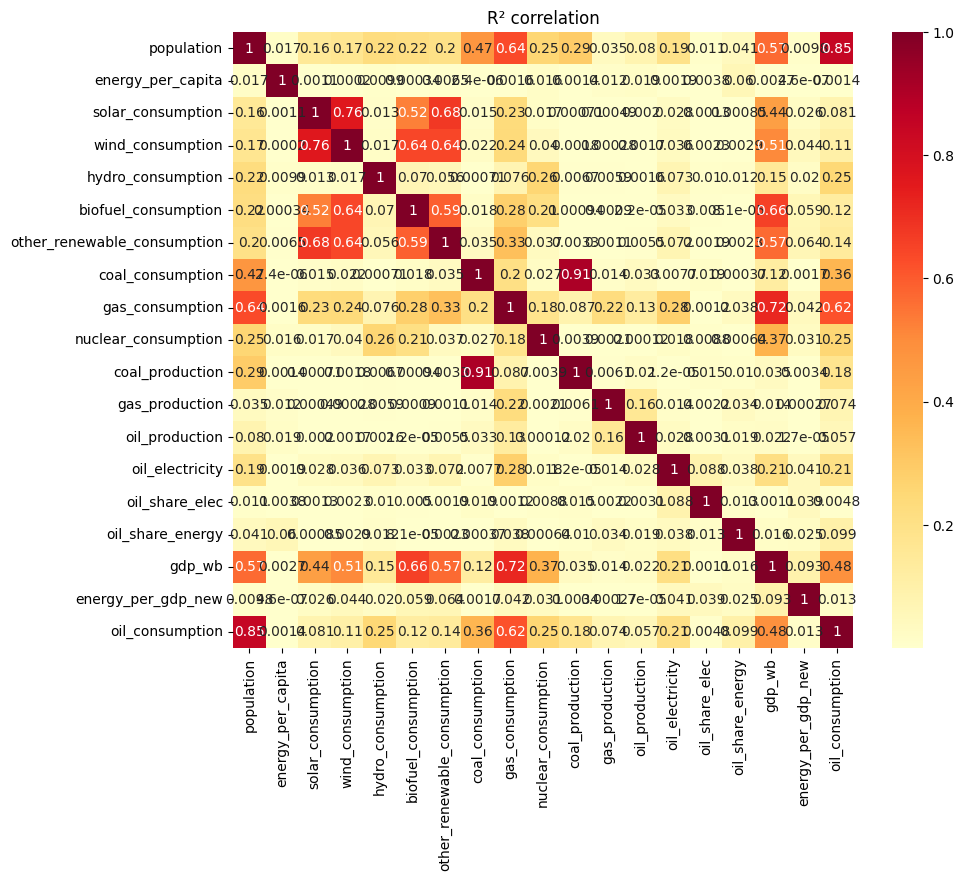

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('R² correlation')
plt.show()

In [62]:
data_oil_eu_interp_extrap['country'].nunique()

21

## Clustering

highly correlated variables might dominate the clustering. If two variables are highly correlated and for some records if distance between for one of these variable is too much we kind of double count them because of multicollinearity and even if other variables are close to each other the multicorrelated ones dominate the distances thus clustering.

However these are part of the original data solar_consumption and wind_consumption are correlated and dominate the clustering but maybe they actually should dominate, so it is not always a bad thing.

But we will first use PCA to get low dimension representation of the variables and get rid off the unnecessary information (highly correlated variables) and then apply clustering. And then we will apply clustering without PCA and compare the clusters.

In [69]:
data_train = data_oil_eu_interp_extrap[data_oil_eu_interp_extrap['year'] < 2000]
data_val = data_oil_eu_interp_extrap[(data_oil_eu_interp_extrap['year'] >= 2000) & (data_oil_eu_interp_extrap['year'] <= 2010)]
data_test = data_oil_eu_interp_extrap[data_oil_eu_interp_extrap['year'] > 2010]

cluster_data = pd.concat([data_train, data_val])

In [70]:
X = cluster_data[corr_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.9) # reduced dimension must still explain at least 90% of the variation
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape) # there are 10 components, 19 variables reduced to 10

(941, 10)


In [102]:
# as you descrease eps and increase samples you force to increase the cluster number because your constraints are more strict now
dbs = DBSCAN(eps = 1.5, min_samples=10)  # 2.0, 5
dbs_labels = dbs.fit_predict(X_pca)

In [103]:
np.unique(dbs_labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
 array([ 97, 633,  21,  22,  20,  17,  38,  45,  22,  26], dtype=int64))

In [104]:
cluster_data['dbs_cluster'] = dbs_labels

In [105]:
cluster_data.groupby('dbs_cluster').agg(count=('oil_consumption', 'count'),
                                        median_oil_cons = ('oil_consumption', 'median'),
                                        mean_oil_cons = ('oil_consumption', 'mean'),
                                        std_oil_cons = ('oil_consumption', 'std'),
                                        min_oil_cons = ('oil_consumption', 'min'),
                                        max_oil_cons = ('oil_consumption', 'max'),
                                        median_popu = ('population', 'median'),
                                        mean_popu = ('population','mean'),
                                        median_gas_cons = ('gas_consumption', 'median'),
                                        mean_gas_cons = ('gas_consumption', 'mean'),
                                        median_gdp = ('gdp_wb', 'median'),
                                        mean_gdp = ('gdp_wb', 'mean'))

,count,median_oil_cons,mean_oil_cons,std_oil_cons,min_oil_cons,max_oil_cons,median_popu,mean_popu,median_gas_cons,mean_gas_cons,median_gdp,mean_gdp
dbs_cluster,,,,,,,,,,,,
-1,97,817.3200,676.824454,612.249118,9.832,1658.878,42230268.0,3.685459e+07,78.8700,310.020608,2.833862e+11,9.971342e+11
0,633,125.9780,214.450104,268.240296,4.680,1506.026,8892099.0,1.238159e+07,33.6380,53.522449,5.931952e+10,1.073957e+11
1,21,29.6740,28.219952,5.397894,18.565,35.382,948238.0,9.508796e+05,0.0000,0.000000,1.039790e+10,1.373183e+10
2,22,1103.6105,1096.160545,41.873594,1012.842,1157.169,57521768.0,5.772923e+07,354.2235,367.623636,1.387743e+12,1.417206e+12
3,20,1651.2755,1673.952500,159.861619,1468.383,1949.953,78156088.0,7.820214e+07,571.5720,525.232150,7.583454e+11,8.178929e+11
4,17,1124.7030,1121.059941,23.398605,1067.589,1153.954,56885124.0,5.689719e+07,519.3060,541.666176,1.183945e+12,1.176982e+12
5,38,451.3290,459.672184,63.403941,349.007,583.520,15098633.0,1.510201e+07,395.8330,391.206079,3.410264e+11,3.750113e+11
6,45,191.3750,191.735444,62.152435,64.425,309.674,37654412.0,3.632022e+07,102.0240,97.121867,2.638538e+11,2.593065e+11
7,22,164.1145,158.782000,43.482536,84.556,231.763,21308456.0,2.107684e+07,288.2735,270.618955,9.797611e+10,9.686682e+10


In [108]:
cluster_data[cluster_data['dbs_cluster'] == 1]

,country,year,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,...,gas_production,oil_consumption,oil_electricity,oil_production,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new,oil_prod_per_capita_new,dbs_cluster
199,Cyprus,1990,788501.0,24444.529,0.000,0.000,0.0,0.000,0.000,0.709,...,0.0,18.565,1.97,0.0,100.000,0.0,5.591130e+09,3.447342,0.0,1
200,Cyprus,1991,799067.0,24418.672,0.000,0.000,0.0,0.000,0.000,0.523,...,0.0,18.989,2.08,0.0,100.000,0.0,5.770197e+09,3.381540,0.0,1
201,Cyprus,1992,810435.0,28128.943,0.000,0.000,0.0,0.000,0.000,0.965,...,0.0,21.831,2.43,0.0,100.000,0.0,6.912150e+09,3.298059,0.0,1
202,Cyprus,1993,825993.0,28680.846,0.000,0.000,0.0,0.000,0.000,0.814,...,0.0,22.876,2.59,0.0,100.000,0.0,6.590291e+09,3.594709,0.0,1
203,Cyprus,1994,844452.0,28103.857,0.000,0.000,0.0,0.000,0.000,1.116,...,0.0,22.616,2.68,0.0,100.000,0.0,7.425704e+09,3.195974,0.0,1
204,Cyprus,1995,862419.0,29255.701,0.000,0.000,0.0,0.000,0.000,1.244,...,0.0,23.986,2.50,0.0,100.000,0.0,9.933137e+09,2.540051,0.0,1
205,Cyprus,1996,880064.0,29094.268,0.000,0.000,0.0,0.000,0.000,1.163,...,0.0,24.442,2.61,0.0,100.000,0.0,1.001191e+10,2.557435,0.0,1
206,Cyprus,1997,897476.0,28804.803,0.000,0.000,0.0,0.000,0.000,0.884,...,0.0,24.968,2.73,0.0,100.000,0.0,9.547816e+09,2.707595,0.0,1
207,Cyprus,1998,914667.0,30007.211,0.000,0.000,0.0,0.000,0.000,0.163,...,0.0,27.284,2.99,0.0,100.000,0.0,1.024862e+10,2.678079,0.0,1
208,Cyprus,1999,931612.0,31000.758,0.000,0.000,0.0,0.000,0.000,0.279,...,0.0,28.602,3.14,0.0,100.000,0.0,1.049791e+10,2.751089,0.0,1


In [113]:
dbs_cluster_mapping = {-1: 'noisy_big_player',
                       2: 'big_player',
                       3: 'big_player',
                       4: 'big_player',
                       1: 'outlier',
                       0: 'baseline',
                       5: 'small_player',
                       6: 'small_player',
                       7: 'small_player',
                       8: 'small_player'}

cluster_data['dbs_cluster'] = cluster_data['dbs_cluster'].replace(dbs_cluster_mapping)

In [115]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
cluster_data['kmn_cluster'] = kmeans.fit_predict(X_pca)

In [116]:
cluster_data.groupby('kmn_cluster').agg(count=('oil_consumption', 'count'),
                                        median_oil_cons = ('oil_consumption', 'median'),
                                        mean_oil_cons = ('oil_consumption', 'mean'),
                                        std_oil_cons = ('oil_consumption', 'std'),
                                        min_oil_cons = ('oil_consumption', 'min'),
                                        max_oil_cons = ('oil_consumption', 'max'),
                                        median_popu = ('population', 'median'),
                                        mean_popu = ('population','mean'),
                                        median_gas_cons = ('gas_consumption', 'median'),
                                        mean_gas_cons = ('gas_consumption', 'mean'),
                                        median_gdp = ('gdp_wb', 'median'),
                                        mean_gdp = ('gdp_wb', 'mean'))

,count,median_oil_cons,mean_oil_cons,std_oil_cons,min_oil_cons,max_oil_cons,median_popu,mean_popu,median_gas_cons,mean_gas_cons,median_gdp,mean_gdp
kmn_cluster,,,,,,,,,,,,
0,303,84.4730,94.078574,65.736201,4.680,341.142,8520636.0,8.046902e+06,0.000,37.600337,2.203702e+10,3.257466e+10
1,66,411.9180,343.713273,154.422530,84.556,583.520,16161805.0,1.750113e+07,354.524,343.417258,1.440910e+11,2.521079e+11
2,49,1101.1140,1191.299673,260.040589,853.391,1658.878,59224228.0,6.293234e+07,436.684,513.655653,1.636115e+12,1.759090e+12
3,399,156.7980,287.955832,315.137066,11.759,1506.026,8935448.0,1.422646e+07,32.657,54.397965,1.267260e+11,1.700839e+11
4,73,243.3640,710.407795,693.925892,64.425,1949.953,38521868.0,5.178952e+07,110.719,221.558425,3.144872e+11,4.295154e+11
5,20,111.5885,113.640850,11.946541,92.407,136.069,5350707.5,5.348741e+06,48.507,45.140550,1.818183e+11,2.169213e+11
6,23,1116.1200,1097.283261,47.237985,999.884,1153.954,56898972.0,5.712160e+07,535.757,568.533217,1.244988e+12,1.259247e+12
7,8,1348.7410,1248.811250,264.355591,817.320,1460.058,81198000.0,7.253970e+07,883.537,756.787750,3.257232e+12,2.888135e+12


In [117]:
kmn_cluster_mapping = {2: 'big_player',
                       3: 'noisy_small',
                       4: 'noisy_big',
                       1: 'small_player',
                       0: 'small_player',
                       5: 'small_player',
                       6: 'big_player',
                       7: 'big_player'}

cluster_data['kmn_cluster'] = cluster_data['kmn_cluster'].replace(kmn_cluster_mapping)

lets try without dimension reduction and use whole dataset to see whether information is lost in dimension reduction or not

In [120]:
dbs = DBSCAN(eps = 2.0, min_samples=5)  # 2.0, 5
dbs_labels_wopca = dbs.fit_predict(X_scaled)

In [121]:
cluster_data['dbs_cluster_wopca'] = dbs_labels_wopca

cluster_data.groupby('dbs_cluster_wopca').agg(count=('oil_consumption', 'count'),
                                        median_oil_cons = ('oil_consumption', 'median'),
                                        mean_oil_cons = ('oil_consumption', 'mean'),
                                        std_oil_cons = ('oil_consumption', 'std'),
                                        min_oil_cons = ('oil_consumption', 'min'),
                                        max_oil_cons = ('oil_consumption', 'max'),
                                        median_popu = ('population', 'median'),
                                        mean_popu = ('population','mean'),
                                        median_gas_cons = ('gas_consumption', 'median'),
                                        mean_gas_cons = ('gas_consumption', 'mean'),
                                        median_gdp = ('gdp_wb', 'median'),
                                        mean_gdp = ('gdp_wb', 'mean'))

,count,median_oil_cons,mean_oil_cons,std_oil_cons,min_oil_cons,max_oil_cons,median_popu,mean_popu,median_gas_cons,mean_gas_cons,median_gdp,mean_gdp
dbs_cluster_wopca,,,,,,,,,,,,
-1,20,1067.8300,1157.819550,265.558061,817.320,1537.780,62268934.0,6.708923e+07,800.0070,683.623800,2.651023e+12,2.570409e+12
0,772,132.0280,250.294534,297.870497,4.680,1506.026,8979508.5,1.347605e+07,37.5130,78.150028,7.734519e+10,1.710298e+11
1,21,29.6740,28.219952,5.397894,18.565,35.382,948238.0,9.508796e+05,0.0000,0.000000,1.039790e+10,1.373183e+10
2,37,1607.6150,1598.953568,197.887353,1020.570,1949.953,78477528.0,7.889990e+07,583.9390,528.986730,8.034048e+11,1.117750e+12
3,23,1116.1200,1097.283261,47.237985,999.884,1153.954,56898972.0,5.712160e+07,535.7570,568.533217,1.244988e+12,1.259247e+12
4,46,192.9760,194.590109,64.435560,64.425,323.050,37733248.0,3.636972e+07,102.1875,98.539348,2.737842e+11,2.640632e+11
5,22,164.1145,158.782000,43.482536,84.556,231.763,21308456.0,2.107684e+07,288.2735,270.618955,9.797611e+10,9.686682e+10


In [122]:
dbs_cluster_mapping_wopca = {-1: 'big_player',
                       2: 'big_player',
                       3: 'big_player',
                       4: 'small_player',
                       1: 'outlier',
                       0: 'baseline',
                       5: 'small_player'}

cluster_data['dbs_cluster_wopca'] = cluster_data['dbs_cluster_wopca'].replace(dbs_cluster_mapping_wopca)

In [123]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
cluster_data['kmn_cluster_wopca'] = kmeans.fit_predict(X_scaled)

In [124]:
cluster_data.groupby('kmn_cluster_wopca').agg(count=('oil_consumption', 'count'),
                                        median_oil_cons = ('oil_consumption', 'median'),
                                        mean_oil_cons = ('oil_consumption', 'mean'),
                                        std_oil_cons = ('oil_consumption', 'std'),
                                        min_oil_cons = ('oil_consumption', 'min'),
                                        max_oil_cons = ('oil_consumption', 'max'),
                                        median_popu = ('population', 'median'),
                                        mean_popu = ('population','mean'),
                                        median_gas_cons = ('gas_consumption', 'median'),
                                        mean_gas_cons = ('gas_consumption', 'mean'),
                                        median_gdp = ('gdp_wb', 'median'),
                                        mean_gdp = ('gdp_wb', 'mean'))

,count,median_oil_cons,mean_oil_cons,std_oil_cons,min_oil_cons,max_oil_cons,median_popu,mean_popu,median_gas_cons,mean_gas_cons,median_gdp,mean_gdp
kmn_cluster_wopca,,,,,,,,,,,,
0,323,95.195,105.680728,73.467917,4.680,429.031,8856646.0,8.681781e+06,23.3290,42.704882,2.715503e+10,4.090925e+10
1,379,158.287,291.124578,326.501553,11.759,1506.026,8582960.0,1.418866e+07,26.5700,52.402145,1.236821e+11,1.711372e+11
2,24,1111.274,1091.005292,55.500614,946.612,1153.954,56912390.0,5.720921e+07,546.0275,578.532458,1.247040e+12,1.307508e+12
3,8,1348.741,1248.811250,264.355591,817.320,1460.058,81198000.0,7.253970e+07,883.5370,756.787750,3.257232e+12,2.888135e+12
4,73,243.364,710.407795,693.925892,64.425,1949.953,38521868.0,5.178952e+07,110.7190,221.558425,3.144872e+11,4.295154e+11
5,47,126.043,140.235277,41.145902,84.556,231.763,19221488.0,1.381074e+07,151.4670,167.603511,1.382177e+11,1.455313e+11
6,40,451.329,459.102525,62.056294,349.007,583.520,14995564.0,1.500968e+07,391.2500,384.909675,3.233907e+11,3.587465e+11
7,47,1106.107,1199.125553,262.426054,853.391,1658.878,59372784.0,6.318868e+07,436.6840,512.740638,1.636115e+12,1.770735e+12


In [126]:
kmn_cluster_mapping_wopca = {
                       2: 'big_player',
                       3: 'big_player',
                       7: 'big_player',
                       4: 'noisy_big',
                       1: 'noisy_small',
                       0: 'small_player',
                       5: 'small_player',
                       6: 'small_player'}

cluster_data['kmn_cluster_wopca'] = cluster_data['kmn_cluster_wopca'].replace(kmn_cluster_mapping_wopca)

In [129]:
var_list = ['kmn_cluster_wopca', 'kmn_cluster', 'dbs_cluster_wopca', 'dbs_cluster']
for var in var_list:
    model = ols(f'oil_consumption ~ {var}', data=cluster_data).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)

                         sum_sq     df           F         PR(>F)
kmn_cluster_wopca  7.633529e+07    3.0  264.271096  2.996733e-124
Residual           9.021817e+07  937.0         NaN            NaN
                   sum_sq     df           F         PR(>F)
kmn_cluster  8.213254e+07    3.0  303.866953  9.530048e-138
Residual     8.442092e+07  937.0         NaN            NaN
                         sum_sq     df           F         PR(>F)
dbs_cluster_wopca  9.060185e+07    3.0  372.579012  3.090522e-159
Residual           7.595161e+07  937.0         NaN            NaN
                   sum_sq     df           F         PR(>F)
dbs_cluster  7.793695e+07    4.0  205.799649  1.236381e-126
Residual     8.861651e+07  936.0         NaN            NaN


SSbetween gives sum(difference of means between different groups)^2 and SSwithin gives sum(each record-mean of that group)^2 and MSbetween = SSbetween/dfbetween, MSwithin = SSwithin/dfwithin and f-statistic is MSbetween/MSwithin. So when f-statistic is large it means that the variation between each group is larger than the variation within each group and in our case dbs_cluster_wopca has the biggest F-statistic meaning clusters formed from that model has the clearest distinction in terms of oil_consumption

In [131]:
cluster_data.drop(['kmn_cluster_wopca', 'kmn_cluster', 'dbs_cluster'], axis = 1, inplace = True)
cluster_data.rename(columns={'dbs_cluster_wopca': 'cluster'}, inplace=True)

data_train = cluster_data[cluster_data['year'] < 2000]
data_val = cluster_data[(cluster_data['year'] >= 2000) & (cluster_data['year'] <= 2010)]

In [132]:
data_train.head()

,country,year,population,energy_per_capita,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,coal_consumption,...,gas_production,oil_consumption,oil_electricity,oil_production,oil_share_elec,oil_share_energy,gdp_wb,energy_per_gdp_new,oil_prod_per_capita_new,cluster
0,Austria,1965,7269892.0,26066.176,0.0,0.0,47.557,0.0,0.0,59.115,...,19.156,65.297,0.0,33.204,0.0,34.458,1.004166e+10,18.871212,4567.330574,baseline
1,Austria,1966,7320920.0,27090.182,0.0,0.0,51.248,0.0,0.0,56.468,...,20.823,71.789,0.0,32.064,0.0,36.198,1.093953e+10,18.129218,4379.777405,baseline
2,Austria,1967,7375632.0,27165.602,0.0,0.0,52.333,0.0,0.0,53.451,...,19.967,76.548,0.0,31.227,0.0,38.205,1.163457e+10,17.221392,4233.806676,baseline
3,Austria,1968,7413813.0,28897.621,0.0,0.0,53.773,0.0,0.0,52.774,...,18.112,88.466,0.0,31.680,0.0,41.293,1.249986e+10,17.139511,4273.104811,baseline
4,Austria,1969,7439324.0,29831.541,0.0,0.0,49.435,0.0,0.0,51.936,...,16.478,97.226,0.0,32.076,0.0,43.810,1.364748e+10,16.261359,4311.682083,baseline


In [133]:
data_train['cluster'].value_counts()

cluster
baseline        593
small_player     57
big_player       50
outlier          10
Name: count, dtype: int64

In [134]:
data_val['cluster'].value_counts()

cluster
baseline        179
big_player       30
outlier          11
small_player     11
Name: count, dtype: int64

## Regression model for EDA (maybe)